In [ ]:
# Install VELO SDK for easy API access
%pip install velo-sdk matplotlib polars python-dotenv --quiet

In [ ]:
%config InlineBackend.figure_format = 'svg'

In [22]:
import os

import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from velo_sdk.api import APIClient

In [1]:
# try:
#     from google.colab import auth, userdata

#     auth.authenticate_user()
#     os.environ["RISKTHINKING_API_KEY"] = userdata.get("RISKTHINKING_API_KEY")
# except:
#     # Not in Colab or error retrieving secret; skip Colab-specific logic
#     pass

In [4]:
client = APIClient()

In [18]:
# Get company ID for Caterpillar Inc
company = client.companies.search_companies(name="Caterpillar Inc", limit=1)[0]
company_id = company.id

In [19]:
# Get asset locations for company assets
assets = list(client.companies.list_company_assets(company.id))
assets = pd.DataFrame([vars(a) for a in assets])

# View Company Asset Data

In [47]:
assets.head()

,id,name,asset_type,asset_function,asset_category,city,state,latitude,longitude,building_footprint,asset_value,address,hex_id,country,ipcc_region,materiality_score,created_at,updated_at
0,011fa66f-6dee-41d9-bf7a-a8120435f96a,,Wholesale Trade,Storage and Distribution,Commercial Real Estate,Hachinohe,Aomori,40.571154,141.460136,234.088516,0,"2 Chome-12-30 Kikyonokogyodanchi, Hachinohe, 2...",608797232040247295,JPN,E.Asia,18.0,2025-02-14T00:32:22.170165,2025-05-23T18:40:07.880082
1,01b69392-6072-4223-970e-0a90696b4684,,Wholesale Trade,Storage and Distribution,Commercial Real Estate,Higashihiroshima,Hiroshima,34.333634,132.648836,0.000000,0,"881-10 Kurosecho Kanehiro, Higashihiroshima, K...",608802453126643711,JPN,E.Asia,18.0,2025-02-14T00:32:12.520749,2025-05-23T18:38:49.976720
2,01d8f2fe-a9e4-4028-b5de-3b1885286c79,,Professional Services,Office,Commercial Real Estate,Des Plaines,Illinois,42.017990,-87.925922,38392.886719,0,"251 Wille Rd A, Des Plaines, Illinois, 60018, ...",608678175060262911,USA,E.North-America,6.0,2025-02-14T00:34:38.031457,2025-05-23T18:41:11.844642
3,024e69a5-8396-4848-9152-807e1c891aad,,Machinery Manufacturing,Manufacturing,Commercial Real Estate,Franklin,Indiana,39.517635,-86.067305,27903.841797,0,"751 International Dr, Franklin, Indiana, 46131...",608661930621534207,USA,E.North-America,100.0,2025-02-14T00:32:07.425799,2025-05-23T18:40:17.193466
4,0282c0e4-6141-4d22-969a-10d16a31b793,,Wholesale Trade,Storage and Distribution,Commercial Real Estate,Fredericksburg,Virginia,38.348277,-77.513421,0.000000,0,"50 Commerce Pkwy, Fredericksburg, Virginia, 22...",608736626411044863,USA,E.North-America,18.0,2025-02-14T00:31:44.769730,2025-05-23T18:41:39.858788


# View Global Asset Locations

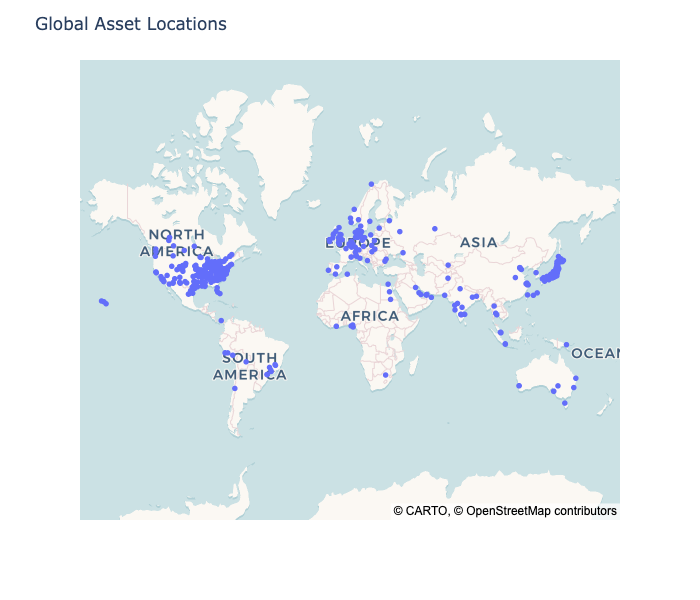

In [34]:
fig = px.scatter_map(
    assets.dropna(subset=["latitude", "longitude"]),
    lat="latitude",
    lon="longitude",
    zoom=0.1,
    center={"lat": assets["latitude"].mean(), "lon": assets["longitude"].mean()},
    height=600,

)

fig.update_layout(title="Global Asset Locations")
fig.show("png")

# View Assets for a Specific Country

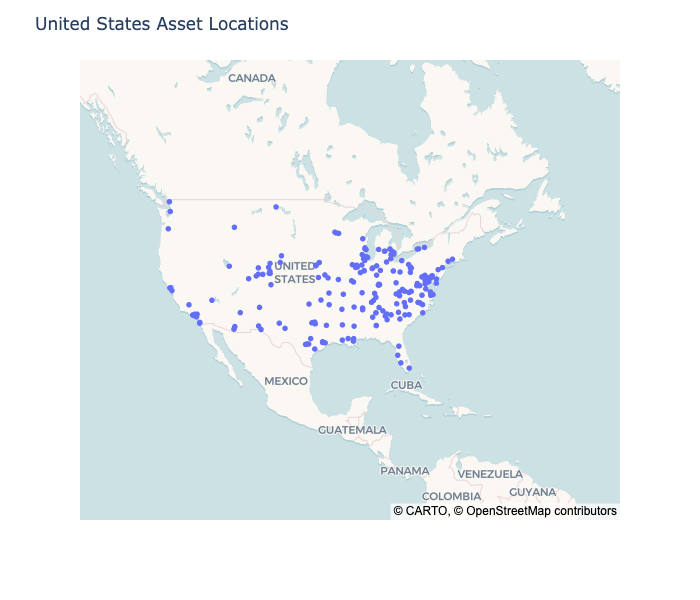

In [46]:
us_assets = assets[assets.country == "USA"]
fig = px.scatter_map(
    us_assets.dropna(subset=["latitude", "longitude"]),
    lat="latitude",
    lon="longitude",
    zoom=2,
    center={"lat": us_assets["latitude"].mean(), "lon": us_assets["longitude"].mean()},
    height=600,

)

fig.update_layout(title="United States Asset Locations")
fig.show("png")